# Spectractor Launcher

Goal is to process a series of images in order to produce spectra

- author Sylvie Dagoret-Campagne
- date : March 29th 2018
- update : April 9th 2018 


In [1]:
theNotebook="Run_Spectractor"

# Spectractor Launcher

In [2]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

## Required packages 

In [3]:
import matplotlib.pyplot as plt
import sys
import os
import pandas as pd

In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [5]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),   #defines the default image size
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [6]:
plt.rcParams.update({'figure.max_open_warning': 0}) # to see a large number of files

## Tools

In [7]:
#sys.path.append("../common_tools/")
#from common_notebook import *
#init_notebook()

## Spectractor 

In [8]:
PATH_SPECTRACTOR='../../Spectractor'

In [9]:
sys.path.append(PATH_SPECTRACTOR)

In [10]:
from spectractor import *

In [11]:
from tools import *
from holo_specs import *
from targets import *
from optics import *
import parameters 

# Configuration

## Input Directory

### HD111980 is missing in logbook

In [12]:
if 0:
    inputdir="/sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17"
    MIN_IMGNUMBER=58
    #MAX_IMGNUMBER=80  # temporary
    MAX_IMGNUMBER=190
    date="20170530"
    object_name='HD111980'
    tag = "reduc"
    SelectTagRe='^%s_%s_([0-9]+).fits$' % (tag,date) # regular expression to select the file
    SearchTagRe='^%s_%s_[0-9]+.fits$' % (tag,date)
    NBIMGPERROW=2
    subdir=os.path.basename(inputdir)

### So use HD205905

In [13]:
#inputdir="/sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17"
inputdir="/Users/dagoret/DATA/CTIODataJune2017_reduced_RG715_v2/data_30may17"
#MIN_IMGNUMBER=208
MIN_IMGNUMBER=230
MAX_IMGNUMBER=284
date="20170530"
object_name='HD205905'
tag = "reduc"
SelectTagRe='^%s_%s_([0-9]+).fits$' % (tag,date) # regular expression to select the file
SearchTagRe='^%s_%s_[0-9]+.fits$' % (tag,date)
NBIMGPERROW=2
subdir=os.path.basename(inputdir)

# Output directory

In [14]:
dir_top_images="images_notebooks/"+theNotebook ### Top directory to save images
ensure_dir(dir_top_images) # create that directory
outputdir="./spectra"
#ensure_dir(outputdir)

In [15]:
#infile_fullpath=os.path.join(PATH_SPECTRACTOR,infile)

In [16]:
sys.path.append(PATH_SPECTRACTOR)

In [17]:
from spectractor import *

# Logbook

In [18]:
#file_logbook_csv='../common_info/ctiofulllogbook_jun2017_v3.csv'
#file_logbook_xlsx='../common_info/ctiofulllogbook_jun2017_v3.xlsx'
file_logbook_xlsx='../common_info/ctiofulllogbook_jun2017_v4.xlsx'

In [19]:
#df=pd.read_csv(file_logbook_csv,index_col=0)
df=pd.read_excel(file_logbook_xlsx,index_col=0)

In [20]:
df.head()

,date,subdir,index,object,filter,disperser,airmass,exposure,focus,seeing,...,T,RH,W,file,Obj-posXpix,Obj-posYpix,Dx,Dy,comment,skip
215,2017-05-30T21:17:00.652,data_30may17,1,bias,RG715,Ron400,1.181,0.0,12650,1.724,...,7.6,36,5.6,reduc_20170630_001.fits,NaN,NaN,NaN,NaN,NaN,NaN
147,2017-05-30T21:17:44.185,data_30may17,2,bias,RG715,Ron400,1.181,0.0,12650,1.724,...,7.6,36,5.6,reduc_20170630_002.fits,NaN,NaN,NaN,NaN,NaN,NaN
13,2017-05-30T21:18:27.708,data_30may17,3,bias,RG715,Ron400,1.181,0.0,12650,1.724,...,7.5,36,4.9,reduc_20170630_003.fits,NaN,NaN,NaN,NaN,NaN,NaN
45,2017-05-30T21:19:11.234,data_30may17,4,bias,RG715,Ron400,1.181,0.0,12650,1.724,...,7.5,36,4.7,reduc_20170630_004.fits,NaN,NaN,NaN,NaN,NaN,NaN
218,2017-05-30T21:19:54.772,data_30may17,5,bias,RG715,Ron400,1.181,0.0,12650,1.724,...,7.5,36,4.7,reduc_20170630_005.fits,NaN,NaN,NaN,NaN,NaN,NaN


# Extract the relevant data and sort by the column index

In [21]:
all_obs=df.loc[(df["subdir"]==subdir) & (df["object"]==object_name),:].sort_values(by=['index'])

In [22]:
all_obs.head()

,date,subdir,index,object,filter,disperser,airmass,exposure,focus,seeing,...,T,RH,W,file,Obj-posXpix,Obj-posYpix,Dx,Dy,comment,skip
71,2017-05-31T07:54:38.806,data_30may17,210,HD205905,dia,Ron400,1.101,60.0,12400,0.793,...,9.5,23,11.6,reduc_20170530_210.fits,790.0,700.0,100.0,100.0,NaN,NaN
39,2017-05-31T07:56:31.293,data_30may17,211,HD205905,dia,Thor300,1.097,60.0,12400,0.793,...,9.4,24,11.5,reduc_20170530_211.fits,790.0,700.0,100.0,100.0,NaN,NaN
5,2017-05-31T07:58:23.653,data_30may17,212,HD205905,dia,HoloPhP,1.094,60.0,12400,0.793,...,9.5,24,10.5,reduc_20170530_212.fits,790.0,700.0,100.0,100.0,NaN,NaN
110,2017-05-31T08:00:16.053,data_30may17,213,HD205905,dia,HoloPhAg,1.090,120.0,12400,0.793,...,9.7,23,12.0,reduc_20170530_213.fits,790.0,700.0,100.0,100.0,NaN,NaN
149,2017-05-31T08:03:08.495,data_30may17,214,HD205905,dia,HoloAmAg,1.085,120.0,12400,0.793,...,9.6,23,13.4,reduc_20170530_214.fits,790.0,700.0,100.0,100.0,NaN,NaN


# Extract relevant info for Spectractor

In [23]:
filex0y0dxdy=all_obs[['index','file','Obj-posXpix','Obj-posYpix','Dx','Dy']]

In [24]:
filex0y0dxdy.head()

,index,file,Obj-posXpix,Obj-posYpix,Dx,Dy
71,210,reduc_20170530_210.fits,790.0,700.0,100.0,100.0
39,211,reduc_20170530_211.fits,790.0,700.0,100.0,100.0
5,212,reduc_20170530_212.fits,790.0,700.0,100.0,100.0
110,213,reduc_20170530_213.fits,790.0,700.0,100.0,100.0
149,214,reduc_20170530_214.fits,790.0,700.0,100.0,100.0


In [25]:
filex0y0dxdy.tail()

,index,file,Obj-posXpix,Obj-posYpix,Dx,Dy
99,280,reduc_20170530_280.fits,785.0,685.0,100.0,100.0
53,281,reduc_20170530_281.fits,785.0,685.0,100.0,100.0
202,282,reduc_20170530_282.fits,785.0,685.0,100.0,100.0
137,283,reduc_20170530_283.fits,785.0,685.0,100.0,100.0
17,284,reduc_20170530_284.fits,760.0,672.0,100.0,100.0


### Select a few spectra for debugging


- def fit_multigauss_and_bgd(x,y,guess=[10,1000,1,0,0,1],bounds=(-np.inf,np.inf),sigma=None):
- maxfev=100000 au lieu de  maxfev=10000



In [26]:
#filex0y0dxdy=filex0y0dxdy.loc[(filex0y0dxdy["index"]>235) &  (filex0y0dxdy["index"]<240),:]

In [27]:
filex0y0dxdy

,index,file,Obj-posXpix,Obj-posYpix,Dx,Dy
71,210,reduc_20170530_210.fits,790.0,700.0,100.0,100.0
39,211,reduc_20170530_211.fits,790.0,700.0,100.0,100.0
5,212,reduc_20170530_212.fits,790.0,700.0,100.0,100.0
110,213,reduc_20170530_213.fits,790.0,700.0,100.0,100.0
149,214,reduc_20170530_214.fits,790.0,700.0,100.0,100.0
216,215,reduc_20170530_215.fits,790.0,700.0,100.0,100.0
97,216,reduc_20170530_216.fits,790.0,700.0,100.0,100.0
136,217,reduc_20170530_217.fits,790.0,700.0,100.0,100.0
89,218,reduc_20170530_218.fits,790.0,700.0,100.0,100.0
121,219,reduc_20170530_219.fits,790.0,700.0,100.0,100.0


### Setting the parameters of Spectractor

In [ ]:
parameters.DEBUG = False
parameters.VERBOSE = True

2018-04-09 10:18:43  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-04-09 10:18:43  Image      load                 INFO   
	Loading image /Users/dagoret/DATA/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_210.fits...
2018-04-09 10:18:43  Image      load                 INFO   
	Image loaded
2018-04-09 10:18:43  Image      load                 INFO   
	Loading disperser Ron400...


******* spectrum id= 71  x0= 790.0  y0= 700.0
Load disperser Ron400:
	from ../../Spectractor/dispersers/Ron400
Grating characteristics:
	N = 400.87 +/- 1.28 grooves/mm
	Average tilt of -0.3 degrees


2018-04-09 10:18:44  spectractor Spectractor          INFO    !!!!!! Spectrum file file ./spectra/reduc_20170530_210_spectrum.fits of size 28800 already exists, thus SKIP the reconstruction ...
2018-04-09 10:18:44  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-04-09 10:18:44  Image      load                 INFO   
	Loading image /Users/dagoret/DATA/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_211.fits...
2018-04-09 10:18:44  Image      load                 INFO   
	Image loaded
2018-04-09 10:18:44  Image      load                 INFO   
	Loading disperser Thor300...


 MAIN_ID        RA           DEC      ... SP_TYPE  SP_QUAL      SP_BIBCODE    
             "h:m:s"       "d:m:s"    ...                                     
--------- ------------- ------------- ... -------- ------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ... G1.5IV-V       C 1989ApJS...71..245K
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
******* spectrum id= 39  x0= 790.0  y0= 700.0
Load disperser Thor300:
	from ../../Spectractor/dispersers/Thor300
Grating characteristics:
	N = 299.51 +/- 0.99 grooves/mm
	Average tilt of -0.6 degrees


2018-04-09 10:18:44  spectractor Spectractor          INFO    !!!!!! Spectrum file file ./spectra/reduc_20170530_211_spectrum.fits of size 25920 already exists, thus SKIP the reconstruction ...
2018-04-09 10:18:44  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-04-09 10:18:44  Image      load                 INFO   
	Loading image /Users/dagoret/DATA/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_212.fits...
2018-04-09 10:18:44  Image      load                 INFO   
	Image loaded
2018-04-09 10:18:44  Image      load                 INFO   
	Loading disperser HoloPhP...


 MAIN_ID        RA           DEC      ... SP_QUAL_2     SP_BIBCODE_2   
             "h:m:s"       "d:m:s"    ...                              
--------- ------------- ------------- ... --------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...         C 1989ApJS...71..245K
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
******* spectrum id= 5  x0= 790.0  y0= 700.0
Load disperser HoloPhP:
	from ../../Spectractor/dispersers/HoloPhP
Hologram characteristics:
	N = 355.08 +/- 1.15 grooves/mm at plate center
	Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -1.0 degrees
	Hologram center at x0 = 856.0 and y0 = 562.3 with average ti

2018-04-09 10:18:44  spectractor Spectractor          INFO    !!!!!! Spectrum file file ./spectra/reduc_20170530_212_spectrum.fits of size 28800 already exists, thus SKIP the reconstruction ...
2018-04-09 10:18:44  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-04-09 10:18:44  Image      load                 INFO   
	Loading image /Users/dagoret/DATA/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_213.fits...
2018-04-09 10:18:44  Image      load                 INFO   
	Image loaded
2018-04-09 10:18:44  Image      load                 INFO   
	Loading disperser HoloPhAg...


 MAIN_ID        RA           DEC      ... SP_QUAL_3     SP_BIBCODE_3   
             "h:m:s"       "d:m:s"    ...                              
--------- ------------- ------------- ... --------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...         C 1989ApJS...71..245K
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
******* spectrum id= 110  x0= 790.0  y0= 700.0
Load disperser HoloPhAg:
	from ../../Spectractor/dispersers/HoloPhAg
Hologram characteristics:
	N = 348.76 +/- 1.13 grooves/mm at plate center
	Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -1.9 degrees
	Hologram center at x0 = 1044.2 and y0 = 606.7 with avera

2018-04-09 10:18:44  spectractor Spectractor          INFO    !!!!!! Spectrum file file ./spectra/reduc_20170530_213_spectrum.fits of size 28800 already exists, thus SKIP the reconstruction ...
2018-04-09 10:18:44  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-04-09 10:18:44  Image      load                 INFO   
	Loading image /Users/dagoret/DATA/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_214.fits...
2018-04-09 10:18:44  Image      load                 INFO   
	Image loaded
2018-04-09 10:18:44  Image      load                 INFO   
	Loading disperser HoloAmAg...


 MAIN_ID        RA           DEC      ... SP_QUAL_4     SP_BIBCODE_4   
             "h:m:s"       "d:m:s"    ...                              
--------- ------------- ------------- ... --------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...         C 1989ApJS...71..245K
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
******* spectrum id= 149  x0= 790.0  y0= 700.0
Load disperser HoloAmAg:
	from ../../Spectractor/dispersers/HoloAmAg
Hologram characteristics:
	N = 348.73 +/- 1.14 grooves/mm at plate center
	Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -1.9 degrees
	Hologram center at x0 = 1070.9 and y0 = 586.1 with avera

2018-04-09 10:18:45  spectractor Spectractor          INFO    !!!!!! Spectrum file file ./spectra/reduc_20170530_214_spectrum.fits of size 28800 already exists, thus SKIP the reconstruction ...
2018-04-09 10:18:45  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-04-09 10:18:45  Image      load                 INFO   
	Loading image /Users/dagoret/DATA/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_215.fits...
2018-04-09 10:18:45  Image      load                 INFO   
	Image loaded
2018-04-09 10:18:45  Image      load                 INFO   
	Loading disperser Ron400...


 MAIN_ID        RA           DEC      ... SP_QUAL_5     SP_BIBCODE_5   
             "h:m:s"       "d:m:s"    ...                              
--------- ------------- ------------- ... --------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...         C 1989ApJS...71..245K
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
******* spectrum id= 216  x0= 790.0  y0= 700.0
Load disperser Ron400:
	from ../../Spectractor/dispersers/Ron400
Grating characteristics:
	N = 400.87 +/- 1.28 grooves/mm
	Average tilt of -0.3 degrees


2018-04-09 10:18:45  spectractor Spectractor          INFO    !!!!!! Spectrum file file ./spectra/reduc_20170530_215_spectrum.fits of size 28800 already exists, thus SKIP the reconstruction ...
2018-04-09 10:18:45  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-04-09 10:18:45  Image      load                 INFO   
	Loading image /Users/dagoret/DATA/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_216.fits...
2018-04-09 10:18:45  Image      load                 INFO   
	Image loaded
2018-04-09 10:18:45  Image      load                 INFO   
	Loading disperser Thor300...


 MAIN_ID        RA           DEC      ... SP_QUAL_6     SP_BIBCODE_6   
             "h:m:s"       "d:m:s"    ...                              
--------- ------------- ------------- ... --------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...         C 1989ApJS...71..245K
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
******* spectrum id= 97  x0= 790.0  y0= 700.0
Load disperser Thor300:
	from ../../Spectractor/dispersers/Thor300
Grating characteristics:
	N = 299.51 +/- 0.99 grooves/mm
	Average tilt of -0.6 degrees


2018-04-09 10:18:45  spectractor Spectractor          INFO    !!!!!! Spectrum file file ./spectra/reduc_20170530_216_spectrum.fits of size 25920 already exists, thus SKIP the reconstruction ...
2018-04-09 10:18:45  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-04-09 10:18:45  Image      load                 INFO   
	Loading image /Users/dagoret/DATA/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_217.fits...
2018-04-09 10:18:45  Image      load                 INFO   
	Image loaded
2018-04-09 10:18:45  Image      load                 INFO   
	Loading disperser HoloPhP...


 MAIN_ID        RA           DEC      ... SP_QUAL_7     SP_BIBCODE_7   
             "h:m:s"       "d:m:s"    ...                              
--------- ------------- ------------- ... --------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...         C 1989ApJS...71..245K
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
******* spectrum id= 136  x0= 790.0  y0= 700.0
Load disperser HoloPhP:
	from ../../Spectractor/dispersers/HoloPhP
Hologram characteristics:
	N = 355.08 +/- 1.15 grooves/mm at plate center
	Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -1.0 degrees
	Hologram center at x0 = 856.0 and y0 = 562.3 with average 

2018-04-09 10:18:46  spectractor Spectractor          INFO    !!!!!! Spectrum file file ./spectra/reduc_20170530_217_spectrum.fits of size 28800 already exists, thus SKIP the reconstruction ...
2018-04-09 10:18:46  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-04-09 10:18:46  Image      load                 INFO   
	Loading image /Users/dagoret/DATA/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_218.fits...
2018-04-09 10:18:46  Image      load                 INFO   
	Image loaded
2018-04-09 10:18:46  Image      load                 INFO   
	Loading disperser HoloPhAg...


 MAIN_ID        RA           DEC      ... SP_QUAL_8     SP_BIBCODE_8   
             "h:m:s"       "d:m:s"    ...                              
--------- ------------- ------------- ... --------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...         C 1989ApJS...71..245K
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
******* spectrum id= 89  x0= 790.0  y0= 700.0
Load disperser HoloPhAg:
	from ../../Spectractor/dispersers/HoloPhAg
Hologram characteristics:
	N = 348.76 +/- 1.13 grooves/mm at plate center
	Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -1.9 degrees
	Hologram center at x0 = 1044.2 and y0 = 606.7 with averag

2018-04-09 10:18:46  spectractor Spectractor          INFO    !!!!!! Spectrum file file ./spectra/reduc_20170530_218_spectrum.fits of size 28800 already exists, thus SKIP the reconstruction ...
2018-04-09 10:18:46  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-04-09 10:18:46  Image      load                 INFO   
	Loading image /Users/dagoret/DATA/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_219.fits...
2018-04-09 10:18:46  Image      load                 INFO   
	Image loaded
2018-04-09 10:18:46  Image      load                 INFO   
	Loading disperser HoloAmAg...


 MAIN_ID        RA           DEC      ... SP_QUAL_9     SP_BIBCODE_9   
             "h:m:s"       "d:m:s"    ...                              
--------- ------------- ------------- ... --------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...         C 1989ApJS...71..245K
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
******* spectrum id= 121  x0= 790.0  y0= 700.0
Load disperser HoloAmAg:
	from ../../Spectractor/dispersers/HoloAmAg
Hologram characteristics:
	N = 348.73 +/- 1.14 grooves/mm at plate center
	Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -1.9 degrees
	Hologram center at x0 = 1070.9 and y0 = 586.1 with avera

2018-04-09 10:18:46  spectractor Spectractor          INFO    !!!!!! Spectrum file file ./spectra/reduc_20170530_219_spectrum.fits of size 28800 already exists, thus SKIP the reconstruction ...
2018-04-09 10:18:46  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-04-09 10:18:46  Image      load                 INFO   
	Loading image /Users/dagoret/DATA/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_220.fits...
2018-04-09 10:18:46  Image      load                 INFO   
	Image loaded
2018-04-09 10:18:46  Image      load                 INFO   
	Loading disperser Ron400...


 MAIN_ID        RA           DEC      ... SP_QUAL_10    SP_BIBCODE_10   
             "h:m:s"       "d:m:s"    ...                               
--------- ------------- ------------- ... ---------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...          C 1989ApJS...71..245K
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
******* spectrum id= 219  x0= 790.0  y0= 700.0
Load disperser Ron400:
	from ../../Spectractor/dispersers/Ron400
Grating characteristics:
	N = 400.87 +/- 1.28 grooves/mm
	Average tilt of -0.3 degrees


2018-04-09 10:18:47  spectractor Spectractor          INFO    !!!!!! Spectrum file file ./spectra/reduc_20170530_220_spectrum.fits of size 28800 already exists, thus SKIP the reconstruction ...
2018-04-09 10:18:47  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-04-09 10:18:47  Image      load                 INFO   
	Loading image /Users/dagoret/DATA/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_221.fits...
2018-04-09 10:18:47  Image      load                 INFO   
	Image loaded
2018-04-09 10:18:47  Image      load                 INFO   
	Loading disperser Thor300...


 MAIN_ID        RA           DEC      ... SP_QUAL_11    SP_BIBCODE_11   
             "h:m:s"       "d:m:s"    ...                               
--------- ------------- ------------- ... ---------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...          C 1989ApJS...71..245K
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
******* spectrum id= 4  x0= 790.0  y0= 700.0
Load disperser Thor300:
	from ../../Spectractor/dispersers/Thor300
Grating characteristics:
	N = 299.51 +/- 0.99 grooves/mm
	Average tilt of -0.6 degrees


2018-04-09 10:18:47  spectractor Spectractor          INFO    !!!!!! Spectrum file file ./spectra/reduc_20170530_221_spectrum.fits of size 25920 already exists, thus SKIP the reconstruction ...
2018-04-09 10:18:47  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-04-09 10:18:47  Image      load                 INFO   
	Loading image /Users/dagoret/DATA/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_222.fits...
2018-04-09 10:18:47  Image      load                 INFO   
	Image loaded
2018-04-09 10:18:47  Image      load                 INFO   
	Loading disperser HoloPhP...


 MAIN_ID        RA           DEC      ... SP_QUAL_12    SP_BIBCODE_12   
             "h:m:s"       "d:m:s"    ...                               
--------- ------------- ------------- ... ---------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...          C 1989ApJS...71..245K
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
******* spectrum id= 68  x0= 790.0  y0= 700.0
Load disperser HoloPhP:
	from ../../Spectractor/dispersers/HoloPhP
Hologram characteristics:
	N = 355.08 +/- 1.15 grooves/mm at plate center
	Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -1.0 degrees
	Hologram center at x0 = 856.0 and y0 = 562.3 with avera

2018-04-09 10:18:47  spectractor Spectractor          INFO    !!!!!! Spectrum file file ./spectra/reduc_20170530_222_spectrum.fits of size 28800 already exists, thus SKIP the reconstruction ...
2018-04-09 10:18:47  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-04-09 10:18:47  Image      load                 INFO   
	Loading image /Users/dagoret/DATA/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_223.fits...
2018-04-09 10:18:47  Image      load                 INFO   
	Image loaded
2018-04-09 10:18:47  Image      load                 INFO   
	Loading disperser HoloPhAg...


 MAIN_ID        RA           DEC      ... SP_QUAL_13    SP_BIBCODE_13   
             "h:m:s"       "d:m:s"    ...                               
--------- ------------- ------------- ... ---------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...          C 1989ApJS...71..245K
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
******* spectrum id= 211  x0= 790.0  y0= 700.0
Load disperser HoloPhAg:
	from ../../Spectractor/dispersers/HoloPhAg
Hologram characteristics:
	N = 348.76 +/- 1.13 grooves/mm at plate center
	Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -1.9 degrees
	Hologram center at x0 = 1044.2 and y0 = 606.7 with a

2018-04-09 10:18:47  spectractor Spectractor          INFO    !!!!!! Spectrum file file ./spectra/reduc_20170530_223_spectrum.fits of size 28800 already exists, thus SKIP the reconstruction ...
2018-04-09 10:18:47  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-04-09 10:18:47  Image      load                 INFO   
	Loading image /Users/dagoret/DATA/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_224.fits...
2018-04-09 10:18:47  Image      load                 INFO   
	Image loaded
2018-04-09 10:18:47  Image      load                 INFO   
	Loading disperser HoloAmAg...


 MAIN_ID        RA           DEC      ... SP_QUAL_14    SP_BIBCODE_14   
             "h:m:s"       "d:m:s"    ...                               
--------- ------------- ------------- ... ---------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...          C 1989ApJS...71..245K
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
******* spectrum id= 193  x0= 790.0  y0= 700.0
Load disperser HoloAmAg:
	from ../../Spectractor/dispersers/HoloAmAg
Hologram characteristics:
	N = 348.73 +/- 1.14 grooves/mm at plate center
	Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -1.9 degrees
	Hologram center at x0 = 1070.9 and y0 = 586.1 with a

2018-04-09 10:18:48  spectractor Spectractor          INFO    !!!!!! Spectrum file file ./spectra/reduc_20170530_224_spectrum.fits of size 28800 already exists, thus SKIP the reconstruction ...
2018-04-09 10:18:48  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-04-09 10:18:48  Image      load                 INFO   
	Loading image /Users/dagoret/DATA/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_225.fits...
2018-04-09 10:18:48  Image      load                 INFO   
	Image loaded
2018-04-09 10:18:48  Image      load                 INFO   
	Loading disperser Ron400...


 MAIN_ID        RA           DEC      ... SP_QUAL_15    SP_BIBCODE_15   
             "h:m:s"       "d:m:s"    ...                               
--------- ------------- ------------- ... ---------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...          C 1989ApJS...71..245K
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
******* spectrum id= 183  x0= 790.0  y0= 700.0
Load disperser Ron400:
	from ../../Spectractor/dispersers/Ron400
Grating characteristics:
	N = 400.87 +/- 1.28 grooves/mm
	Average tilt of -0.3 degrees


2018-04-09 10:18:48  spectractor Spectractor          INFO    !!!!!! Spectrum file file ./spectra/reduc_20170530_225_spectrum.fits of size 28800 already exists, thus SKIP the reconstruction ...
2018-04-09 10:18:48  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-04-09 10:18:48  Image      load                 INFO   
	Loading image /Users/dagoret/DATA/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_226.fits...
2018-04-09 10:18:48  Image      load                 INFO   
	Image loaded
2018-04-09 10:18:48  Image      load                 INFO   
	Loading disperser Thor300...


 MAIN_ID        RA           DEC      ... SP_QUAL_16    SP_BIBCODE_16   
             "h:m:s"       "d:m:s"    ...                               
--------- ------------- ------------- ... ---------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...          C 1989ApJS...71..245K
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
******* spectrum id= 76  x0= 790.0  y0= 700.0
Load disperser Thor300:
	from ../../Spectractor/dispersers/Thor300
Grating characteristics:
	N = 299.51 +/- 0.99 grooves/mm
	Average tilt of -0.6 degrees


2018-04-09 10:18:48  spectractor Spectractor          INFO    !!!!!! Spectrum file file ./spectra/reduc_20170530_226_spectrum.fits of size 25920 already exists, thus SKIP the reconstruction ...
2018-04-09 10:18:48  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-04-09 10:18:48  Image      load                 INFO   
	Loading image /Users/dagoret/DATA/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_227.fits...
2018-04-09 10:18:48  Image      load                 INFO   
	Image loaded
2018-04-09 10:18:48  Image      load                 INFO   
	Loading disperser HoloPhP...


 MAIN_ID        RA           DEC      ... SP_QUAL_17    SP_BIBCODE_17   
             "h:m:s"       "d:m:s"    ...                               
--------- ------------- ------------- ... ---------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...          C 1989ApJS...71..245K
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
******* spectrum id= 276  x0= 790.0  y0= 700.0
Load disperser HoloPhP:
	from ../../Spectractor/dispersers/HoloPhP
Hologram characteristics:
	N = 355.08 +/- 1.15 grooves/mm at plate center
	Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -1.0 degrees
	Hologram center at x0 = 856.0 and y0 = 562.3 with aver

2018-04-09 10:18:49  spectractor Spectractor          INFO    !!!!!! Spectrum file file ./spectra/reduc_20170530_227_spectrum.fits of size 28800 already exists, thus SKIP the reconstruction ...
2018-04-09 10:18:49  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-04-09 10:18:49  Image      load                 INFO   
	Loading image /Users/dagoret/DATA/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_228.fits...
2018-04-09 10:18:49  Image      load                 INFO   
	Image loaded
2018-04-09 10:18:49  Image      load                 INFO   
	Loading disperser HoloPhAg...


 MAIN_ID        RA           DEC      ... SP_QUAL_18    SP_BIBCODE_18   
             "h:m:s"       "d:m:s"    ...                               
--------- ------------- ------------- ... ---------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...          C 1989ApJS...71..245K
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
******* spectrum id= 237  x0= 790.0  y0= 700.0
Load disperser HoloPhAg:
	from ../../Spectractor/dispersers/HoloPhAg
Hologram characteristics:
	N = 348.76 +/- 1.13 grooves/mm at plate center
	Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -1.9 degrees
	Hologram center at x0 = 1044.2 and y0 = 606.7 with a

2018-04-09 10:18:49  spectractor Spectractor          INFO    !!!!!! Spectrum file file ./spectra/reduc_20170530_228_spectrum.fits of size 28800 already exists, thus SKIP the reconstruction ...
2018-04-09 10:18:49  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-04-09 10:18:49  Image      load                 INFO   
	Loading image /Users/dagoret/DATA/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_229.fits...
2018-04-09 10:18:49  Image      load                 INFO   
	Image loaded
2018-04-09 10:18:49  Image      load                 INFO   
	Loading disperser HoloAmAg...


 MAIN_ID        RA           DEC      ... SP_QUAL_19    SP_BIBCODE_19   
             "h:m:s"       "d:m:s"    ...                               
--------- ------------- ------------- ... ---------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...          C 1989ApJS...71..245K
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
******* spectrum id= 83  x0= 790.0  y0= 700.0
Load disperser HoloAmAg:
	from ../../Spectractor/dispersers/HoloAmAg
Hologram characteristics:
	N = 348.73 +/- 1.14 grooves/mm at plate center
	Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -1.9 degrees
	Hologram center at x0 = 1070.9 and y0 = 586.1 with av

2018-04-09 10:18:50  spectractor Spectractor          INFO    !!!!!! Spectrum file file ./spectra/reduc_20170530_229_spectrum.fits of size 28800 already exists, thus SKIP the reconstruction ...
2018-04-09 10:18:50  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-04-09 10:18:50  Image      load                 INFO   
	Loading image /Users/dagoret/DATA/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_230.fits...
2018-04-09 10:18:50  Image      load                 INFO   
	Image loaded
2018-04-09 10:18:50  Image      load                 INFO   
	Loading disperser Ron400...


 MAIN_ID        RA           DEC      ... SP_QUAL_20    SP_BIBCODE_20   
             "h:m:s"       "d:m:s"    ...                               
--------- ------------- ------------- ... ---------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...          C 1989ApJS...71..245K
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
******* spectrum id= 111  x0= 790.0  y0= 700.0
Load disperser Ron400:
	from ../../Spectractor/dispersers/Ron400
Grating characteristics:
	N = 400.87 +/- 1.28 grooves/mm
	Average tilt of -0.3 degrees


2018-04-09 10:18:50  spectractor Spectractor          INFO    !!!!!! Spectrum file file ./spectra/reduc_20170530_230_spectrum.fits of size 28800 already exists, thus SKIP the reconstruction ...
2018-04-09 10:18:50  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-04-09 10:18:50  Image      load                 INFO   
	Loading image /Users/dagoret/DATA/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_231.fits...
2018-04-09 10:18:50  Image      load                 INFO   
	Image loaded
2018-04-09 10:18:50  Image      load                 INFO   
	Loading disperser Thor300...


 MAIN_ID        RA           DEC      ... SP_QUAL_21    SP_BIBCODE_21   
             "h:m:s"       "d:m:s"    ...                               
--------- ------------- ------------- ... ---------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...          C 1989ApJS...71..245K
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
******* spectrum id= 267  x0= 790.0  y0= 700.0
Load disperser Thor300:
	from ../../Spectractor/dispersers/Thor300
Grating characteristics:
	N = 299.51 +/- 0.99 grooves/mm
	Average tilt of -0.6 degrees


2018-04-09 10:18:50  spectractor Spectractor          INFO    !!!!!! Spectrum file file ./spectra/reduc_20170530_231_spectrum.fits of size 25920 already exists, thus SKIP the reconstruction ...
2018-04-09 10:18:50  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-04-09 10:18:50  Image      load                 INFO   
	Loading image /Users/dagoret/DATA/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_232.fits...
2018-04-09 10:18:50  Image      load                 INFO   
	Image loaded
2018-04-09 10:18:50  Image      load                 INFO   
	Loading disperser HoloPhP...


 MAIN_ID        RA           DEC      ... SP_QUAL_22    SP_BIBCODE_22   
             "h:m:s"       "d:m:s"    ...                               
--------- ------------- ------------- ... ---------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...          C 1989ApJS...71..245K
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
******* spectrum id= 84  x0= 790.0  y0= 700.0
Load disperser HoloPhP:
	from ../../Spectractor/dispersers/HoloPhP
Hologram characteristics:
	N = 355.08 +/- 1.15 grooves/mm at plate center
	Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -1.0 degrees
	Hologram center at x0 = 856.0 and y0 = 562.3 with avera

2018-04-09 10:18:51  spectractor Spectractor          INFO    !!!!!! Spectrum file file ./spectra/reduc_20170530_232_spectrum.fits of size 28800 already exists, thus SKIP the reconstruction ...
2018-04-09 10:18:51  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-04-09 10:18:51  Image      load                 INFO   
	Loading image /Users/dagoret/DATA/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_233.fits...
2018-04-09 10:18:51  Image      load                 INFO   
	Image loaded
2018-04-09 10:18:51  Image      load                 INFO   
	Loading disperser HoloPhAg...


 MAIN_ID        RA           DEC      ... SP_QUAL_23    SP_BIBCODE_23   
             "h:m:s"       "d:m:s"    ...                               
--------- ------------- ------------- ... ---------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...          C 1989ApJS...71..245K
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
******* spectrum id= 112  x0= 790.0  y0= 700.0
Load disperser HoloPhAg:
	from ../../Spectractor/dispersers/HoloPhAg
Hologram characteristics:
	N = 348.76 +/- 1.13 grooves/mm at plate center
	Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -1.9 degrees
	Hologram center at x0 = 1044.2 and y0 = 606.7 with a

2018-04-09 10:18:51  spectractor Spectractor          INFO    !!!!!! Spectrum file file ./spectra/reduc_20170530_233_spectrum.fits of size 28800 already exists, thus SKIP the reconstruction ...
2018-04-09 10:18:51  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-04-09 10:18:51  Image      load                 INFO   
	Loading image /Users/dagoret/DATA/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_234.fits...
2018-04-09 10:18:51  Image      load                 INFO   
	Image loaded
2018-04-09 10:18:51  Image      load                 INFO   
	Loading disperser HoloAmAg...


 MAIN_ID        RA           DEC      ... SP_QUAL_24    SP_BIBCODE_24   
             "h:m:s"       "d:m:s"    ...                               
--------- ------------- ------------- ... ---------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...          C 1989ApJS...71..245K
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
******* spectrum id= 207  x0= 790.0  y0= 700.0
Load disperser HoloAmAg:
	from ../../Spectractor/dispersers/HoloAmAg
Hologram characteristics:
	N = 348.73 +/- 1.14 grooves/mm at plate center
	Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -1.9 degrees
	Hologram center at x0 = 1070.9 and y0 = 586.1 with a

2018-04-09 10:18:51  spectractor Spectractor          INFO    !!!!!! Spectrum file file ./spectra/reduc_20170530_234_spectrum.fits of size 28800 already exists, thus SKIP the reconstruction ...
2018-04-09 10:18:51  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-04-09 10:18:51  Image      load                 INFO   
	Loading image /Users/dagoret/DATA/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_235.fits...
2018-04-09 10:18:51  Image      load                 INFO   
	Image loaded
2018-04-09 10:18:51  Image      load                 INFO   
	Loading disperser Ron400...


 MAIN_ID        RA           DEC      ... SP_QUAL_25    SP_BIBCODE_25   
             "h:m:s"       "d:m:s"    ...                               
--------- ------------- ------------- ... ---------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...          C 1989ApJS...71..245K
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
******* spectrum id= 119  x0= 790.0  y0= 700.0
Load disperser Ron400:
	from ../../Spectractor/dispersers/Ron400
Grating characteristics:
	N = 400.87 +/- 1.28 grooves/mm
	Average tilt of -0.3 degrees


2018-04-09 10:18:52  spectractor Spectractor          INFO    !!!!!! Spectrum file file ./spectra/reduc_20170530_235_spectrum.fits of size 28800 already exists, thus SKIP the reconstruction ...
2018-04-09 10:18:52  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-04-09 10:18:52  Image      load                 INFO   
	Loading image /Users/dagoret/DATA/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_236.fits...
2018-04-09 10:18:52  Image      load                 INFO   
	Image loaded
2018-04-09 10:18:52  Image      load                 INFO   
	Loading disperser Thor300...


 MAIN_ID        RA           DEC      ... SP_QUAL_26    SP_BIBCODE_26   
             "h:m:s"       "d:m:s"    ...                               
--------- ------------- ------------- ... ---------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...          C 1989ApJS...71..245K
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
******* spectrum id= 54  x0= 790.0  y0= 700.0
Load disperser Thor300:
	from ../../Spectractor/dispersers/Thor300
Grating characteristics:
	N = 299.51 +/- 0.99 grooves/mm
	Average tilt of -0.6 degrees


2018-04-09 10:18:52  spectractor Spectractor          INFO    !!!!!! Spectrum file file ./spectra/reduc_20170530_236_spectrum.fits of size 25920 already exists, thus SKIP the reconstruction ...
2018-04-09 10:18:52  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-04-09 10:18:52  Image      load                 INFO   
	Loading image /Users/dagoret/DATA/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_237.fits...
2018-04-09 10:18:52  Image      load                 INFO   
	Image loaded
2018-04-09 10:18:52  Image      load                 INFO   
	Loading disperser HoloPhP...


 MAIN_ID        RA           DEC      ... SP_QUAL_27    SP_BIBCODE_27   
             "h:m:s"       "d:m:s"    ...                               
--------- ------------- ------------- ... ---------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...          C 1989ApJS...71..245K
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
******* spectrum id= 133  x0= 790.0  y0= 700.0
Load disperser HoloPhP:
	from ../../Spectractor/dispersers/HoloPhP
Hologram characteristics:
	N = 355.08 +/- 1.15 grooves/mm at plate center
	Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -1.0 degrees
	Hologram center at x0 = 856.0 and y0 = 562.3 with aver

2018-04-09 10:18:53  spectractor Spectractor          INFO   
	Search for the target in the image...


 MAIN_ID        RA           DEC      ... SP_QUAL_28    SP_BIBCODE_28   
             "h:m:s"       "d:m:s"    ...                               
--------- ------------- ------------- ... ---------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...          C 1989ApJS...71..245K
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits


2018-04-09 10:19:07  Image      find_target_2Dprofile INFO   
	X,Y target position in pixels: 776.954,692.738
2018-04-09 10:19:07  Image      turn_image           INFO   
	Rotate the image with angle theta=-0.95 degree
2018-04-09 10:19:09  spectractor Spectractor          INFO   
	Search for the target in the rotated image...
2018-04-09 10:19:11  Image      find_target_2Dprofile INFO   
	X,Y target position in pixels: 799.484,703.391
2018-04-09 10:19:11  Image      extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*3 pixels and background from 8 to 30 pixels
2018-04-09 10:19:11  Spectrum   __init__             INFO   
	Spectrum info copied from Image
2018-04-09 10:19:11  Spectrum   calibrate_spectrum_with_lines INFO   
	Calibrating order 1 spectrum...
2018-04-09 10:19:12  Spectrum   calibrate_spectrum_with_lines INFO   
	Wavelenght total shift: -3.85nm (after 9 steps)
	with D = 55.81 mm (DISTANCE2CCD = 55.45 +/- 0.19 mm, 1.9 sigma shift)


   Line   Tabulated  Detected   Shift       FWHM    Amplitude     SNR   
              nm        nm        nm         nm                         
--------- --------- --------- ---------- --------- ----------- ---------
$Ca_{II}$   393.366 378.04068 -15.325335 16.484999  -24.246033 23.754154
$Ca_{II}$   396.847 390.95193 -5.8950567  8.395309  -26.941875 26.395306
$H\gamma$     434.0 427.88947 -6.1105237 2.3550098  -3.7348895 3.6591198
 $H\beta$     486.3 493.64365  7.3436337    16.485  -53.596867  52.50955
 $O_2(B)$   686.719 726.49585  39.776848    16.485   -5.632218 5.7613964
    $O_2$     762.1  758.3154   -3.78455    16.485  -37.349133  38.20576
 $O_2(Z)$   822.696  794.6343 -28.061745    16.485 -10.4145155  10.65338


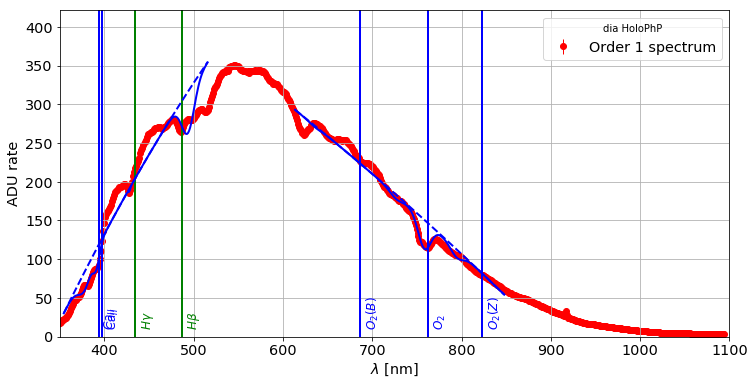

2018-04-09 10:19:13  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./spectra/reduc_20170530_237_spectrum.fits
2018-04-09 10:19:13  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-04-09 10:19:13  Image      load                 INFO   
	Loading image /Users/dagoret/DATA/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_238.fits...
2018-04-09 10:19:13  Image      load                 INFO   
	Image loaded
2018-04-09 10:19:13  Image      load                 INFO   
	Loading disperser HoloPhAg...


******* spectrum id= 177  x0= 790.0  y0= 700.0
Load disperser HoloPhAg:
	from ../../Spectractor/dispersers/HoloPhAg
Hologram characteristics:
	N = 348.76 +/- 1.13 grooves/mm at plate center
	Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -1.9 degrees
	Hologram center at x0 = 1044.2 and y0 = 606.7 with average tilt of -1.9 degrees
Order  0 position at x0 = 779.6 and y0 = 614.7
Order +1 position at x0 = 1308.7 and y0 = 598.7
Distance between the orders: 529.36 pixels (12.70 mm)


2018-04-09 10:19:13  spectractor Spectractor          INFO   
	Search for the target in the image...


 MAIN_ID        RA           DEC      ... SP_QUAL_29    SP_BIBCODE_29   
             "h:m:s"       "d:m:s"    ...                               
--------- ------------- ------------- ... ---------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...          C 1989ApJS...71..245K
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits


In [ ]:
for index, row in filex0y0dxdy.iterrows():
    full_filename=os.path.join(inputdir,row['file'])
    x0,y0=row['Obj-posXpix'], row['Obj-posYpix']
    print '******* spectrum id=',index, ' x0=',x0,' y0=',y0
    # test if file already exists
    
    Spectractor(full_filename,outputdir,[int(x0),int(y0)],object_name)